首先导入`geopandas`和`matplotlib`包

In [34]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
%matplotlib inline 

然后采用`geopandas.read_file()`函数来读取美国地图的shp文件。美国地图的shp文件来源于

In [25]:
states = geopandas.read_file('data/shapefiles/us_state/tl_2017_us_state.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

我们来看一下`states`文件的格式

In [26]:
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


(-130.0, -65.0, 24.0, 50.0)

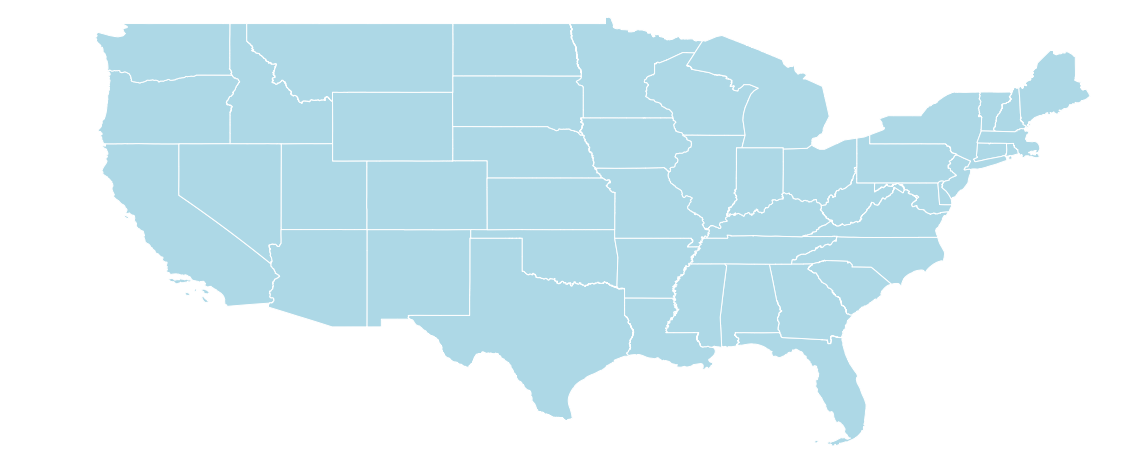

In [32]:
fig, ax = plt.subplots(1, figsize=(20, 20))

states.plot(color = 'lightblue',ax = ax, edgecolor='white', linewidth=1)
ax.set_xlim([-130,-65])
ax.set_ylim([24,50])
ax.axis('off')

(-130.0, -65.0, 24.0, 50.0)

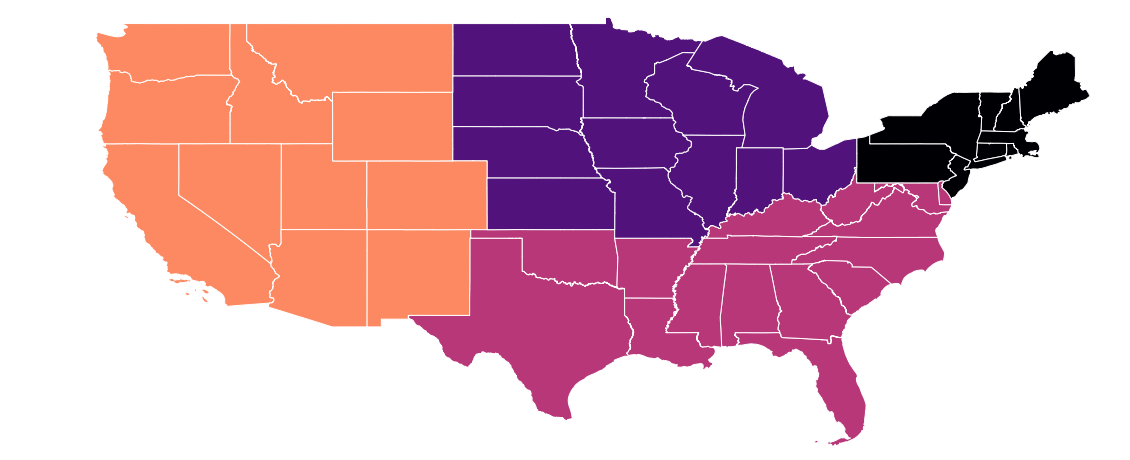

In [33]:
fig, ax = plt.subplots(1, figsize=(20, 20))

states.plot(column='REGION',cmap='magma',ax = ax, edgecolor='white', linewidth=1)
ax.set_xlim([-130,-65])
ax.set_ylim([24,50])
ax.axis('off')

读取美国各州年平均降水数据

In [41]:
prcp = pd.read_csv('data/annual_precipitation.csv')  # dataframe

In [43]:
prcp.head()

,NAME,Inches,Millimetres,Rank
0,Alabama,58.3,1480,4
1,Alaska,22.5,572,39
2,Arizona,13.6,345,47
3,Arkansas,50.6,1284,8
4,California,22.2,563,40


合并降水数据变量和州边界变量

In [45]:
states = pd.merge(left = states, right= prcp,left_on = 'NAME', right_on = 'NAME')

接下来，我们就可以通过geopandas plot 来显示美国各州的年降水量

Text(0, 0.5, 'Inches')

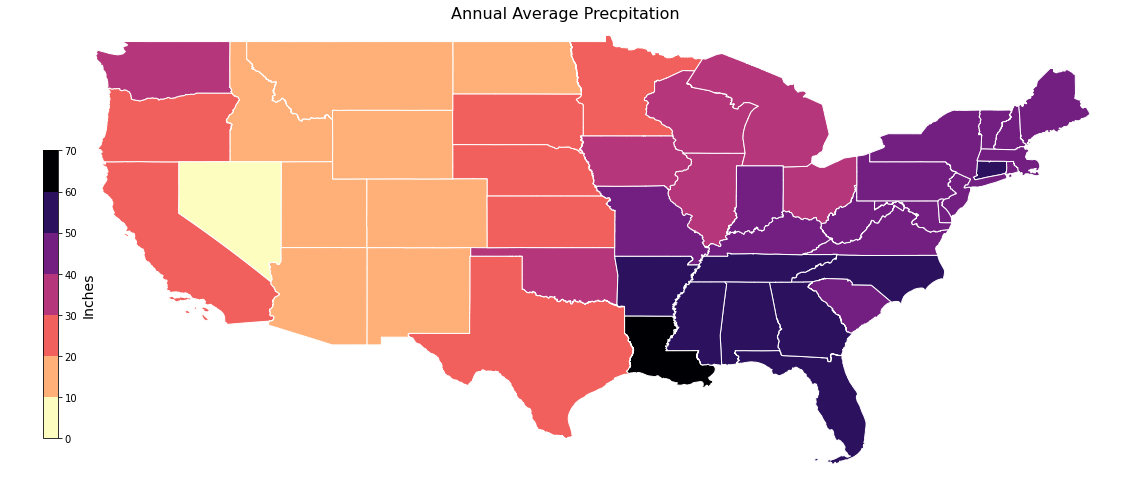

In [68]:
fig, ax = plt.subplots(1, figsize=(20, 20))

vmin=0
vmax=70
cmap = plt.get_cmap('magma_r', 7)

states.plot(column='Inches',cmap = cmap, ax = ax, edgecolor='white', linewidth=1,vmin=vmin, vmax = vmax)
ax.set_xlim([-130,-65])
ax.set_ylim([24,50])
ax.axis('off')
ax.set_title('Annual Average Precpitation',fontsize=16)

# 添加 colorbar
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.37, 0.01, 0.2])
cbar = fig.colorbar(sm, cax=cbaxes)
cbar.ax.set_ylabel('Inches',fontsize=14)

我们也可以用同样的方法来展示某些变量美国18大流域的空间分布情况。首先，我们需要下载美国18大流域的边界文件，这里我已经包含在了data文件夹中。18大流域的边界文件来源于https://apps.nationalmap.gov/downloader/#/. 在筛选条件中选择‘hydrography’、‘watershed Boundary Dataset (WBD)’、‘HU-2 Region’、‘Shapefile’筛选后下载shp文件即可。

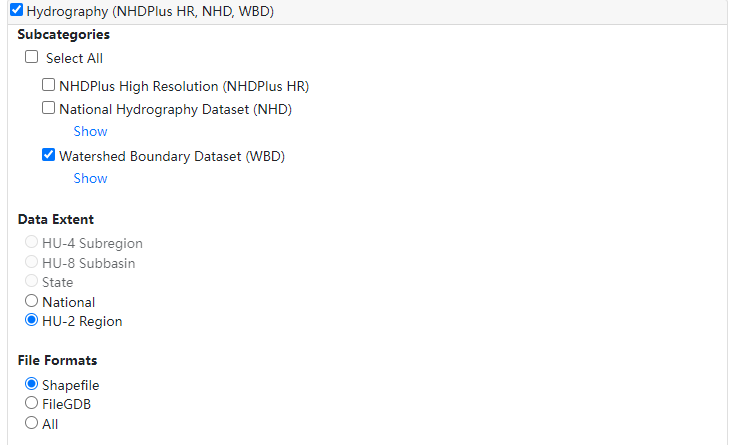

然后我们依次读入相应的huc2文件。美国本土有18个流域，其shp文件是单独的， 我们需要将其一一读取然后合并

In [92]:
for i in range(18):
    if i<9:
        fname = 'data/shapefiles/huc2/0' + str(i+1) + '/WBDHU2.shp'
    else:
        fname = 'data/shapefiles/huc2/' + str(i+1) + '/WBDHU2.shp'
    data = geopandas.read_file(fname)
    
    if i==0:
        huc = data
    else:
        huc = pd.concat([huc,data],ignore_index=True)
     

In [ ]:
我们来看一下合并后数据，

(-130.0, -65.0, 24.0, 50.0)

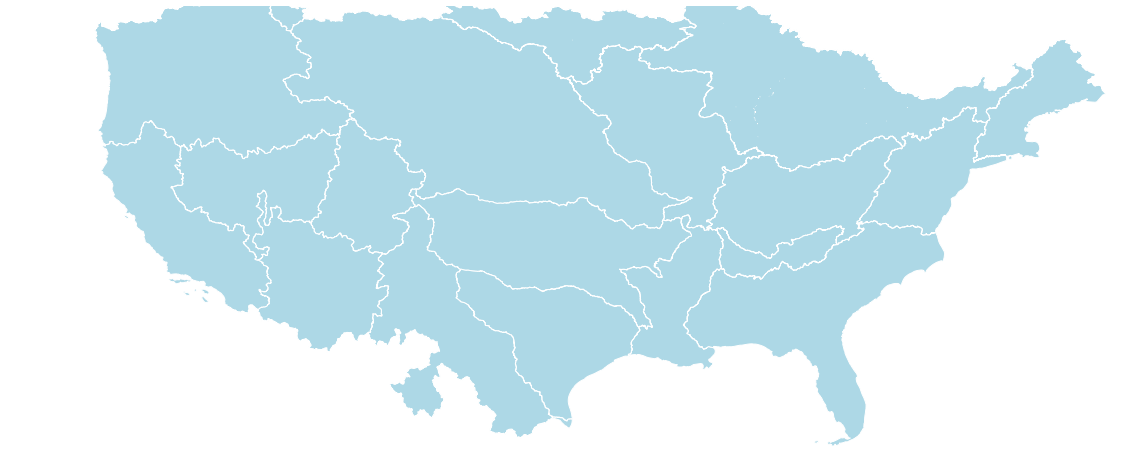

In [93]:
fig, ax = plt.subplots(1, figsize=(20, 20))
huc.plot(ax = ax,edgecolor='white', linewidth=1,color = 'lightblue')
ax.set_xlim([-130,-65])
ax.set_ylim([24,50])
ax.axis('off')

如果要展示美国18个流域的具体情况，我们也可以通过同样的方法来进行实现。首先，我们读取需要展示的数据。比如，我们要展示模型在18个流域的模拟效率系数

In [94]:
rsq = pd.read_csv('data/huc_rsq.csv')  

In [80]:
rsq.head()

,huc2,rsq
0,1,0.489816
1,2,0.507243
2,3,0.464579
3,4,0.615571
4,5,0.573188


然后合并 数据变量 和 shap变量。我们直接通过row index合并就行，因为我的rsq数据是按照huc的序号进行输出的。

In [95]:
huc = pd.merge(left=rsq, right=huc,left_index=True, right_index=True)


In [97]:
from geopandas import GeoDataFrame
huc = GeoDataFrame(huc)

然后进行画图

<AxesSubplot:title={'center':'Model Performance'}>

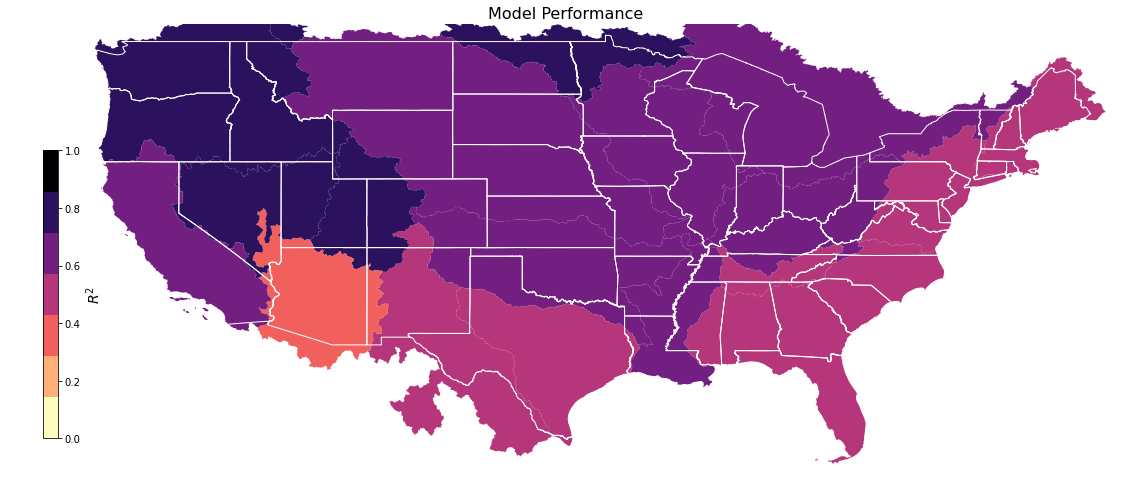

In [105]:
fig, ax = plt.subplots(1, figsize=(20, 20))

vmin = 0
vmax = 1
cmap = plt.get_cmap('magma_r', 7)

huc.plot(column='rsq',cmap = cmap, ax = ax, edgecolor='grey', linewidth=0,vmin=vmin, vmax = vmax)

ax.set_xlim([-130,-65])
ax.set_ylim([24,50])
ax.axis('off')
ax.set_title('Model Performance',fontsize=16)

# 添加 colorbar
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.37, 0.01, 0.2])
cbar = fig.colorbar(sm, cax=cbaxes)
cbar.ax.set_ylabel('$R^2$',fontsize=14)

# 顺便加上conus
states.boundary.plot(ax = ax, edgecolor='white', linewidth=1)


plot conus use geopanda:
https://github.com/joncutrer/geopandas-tutorial/blob/master/geopandas-us-map.ipynb
https://jcutrer.com/python/learn-geopandas-plotting-usmaps
https://github.com/joncutrer/geopandas-tutorial

Precipitation data:
https://www.currentresults.com/Weather/US/average-annual-state-precipitation.php


plot heatmap use geopanda:
https://www.relataly.com/visualize-covid-19-data-on-a-geographic-heat-maps/291/

state bounadies files:
https://catalog.data.gov/dataset/tiger-line-shapefile-2017-nation-u-s-current-state-and-equivalent-national

